___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.shape

(10000, 14)

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [5]:
df.info() # to know the data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe().T # to see the summary of the dataframe

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [7]:
df.isnull().sum() # check for missing values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
df.duplicated().sum() # check for duplicate values

0

In [9]:
# we didn't require customerID, Surname  and Rownumber so we drop it

df = df.drop(["CustomerId","RowNumber","Surname",],axis=1)

In [10]:
#numerical variables

num = list(df.select_dtypes(include=[np.number]).columns)

#categorical variables

cat = list(df.select_dtypes(include='object').columns)

print(cat)

print(num)

['Geography', 'Gender']
['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [11]:
for i in cat:
    print(df[i].value_counts())
    print("------")

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
------
Male      5457
Female    4543
Name: Gender, dtype: int64
------


In [12]:
df.Exited.value_counts() # Target values

0    7963
1    2037
Name: Exited, dtype: int64

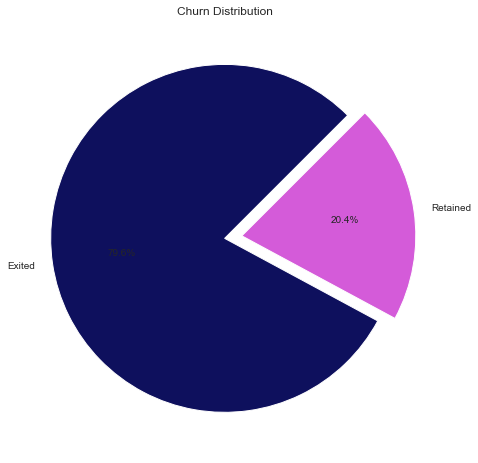

In [13]:
labels = 'Exited', 'Retained'
import random
n = 40
color = ["#" + ''.join([random.choice('0123456789ABCDEF')
                        for j in range(6)]) for i in range(n)]
plt.figure(figsize=(10,8))
explode = [0,0.1]
plt.pie(df['Exited'].value_counts(), labels=labels,explode=explode,autopct='%1.1f%%', colors=color, startangle=45)
plt.title('Churn Distribution');

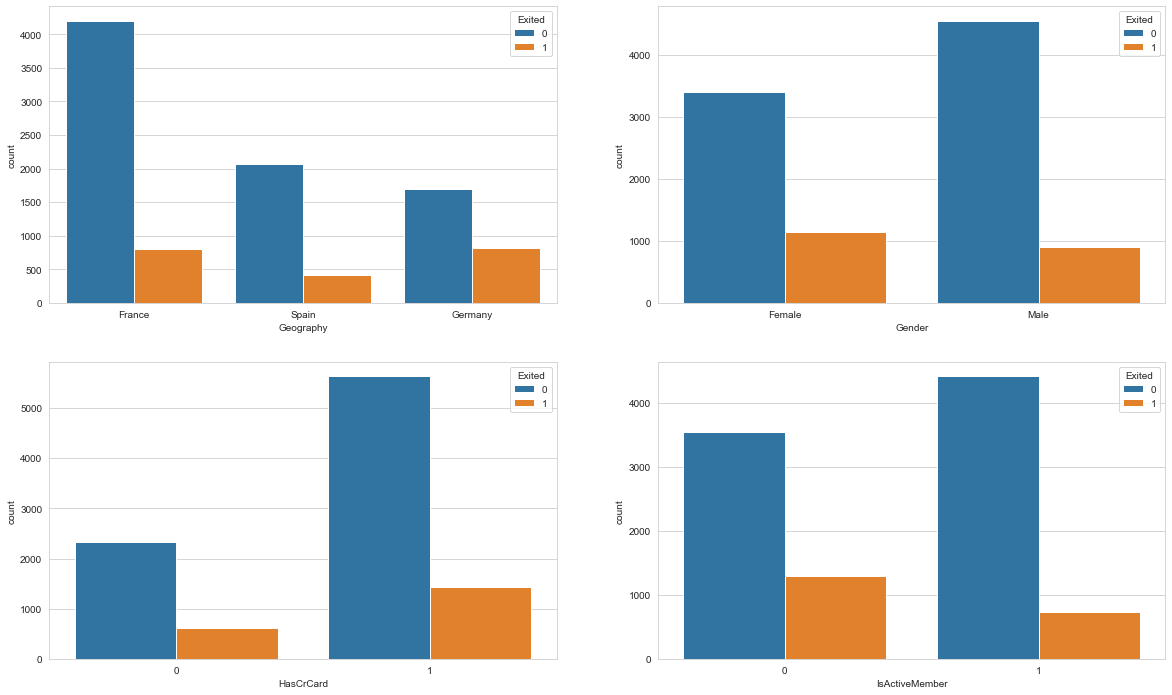

In [14]:
 # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1]);

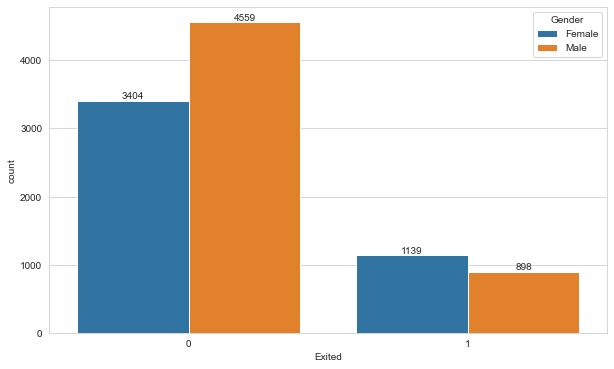

In [15]:
ax = sns.countplot(x='Exited',data=df,hue='Gender')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

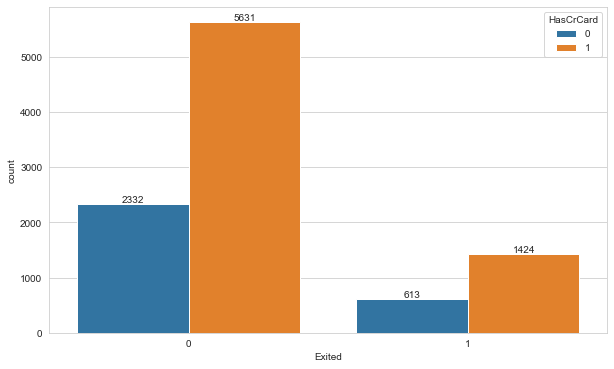

In [16]:
ax = sns.countplot(x='Exited',data=df, hue='HasCrCard')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1]);

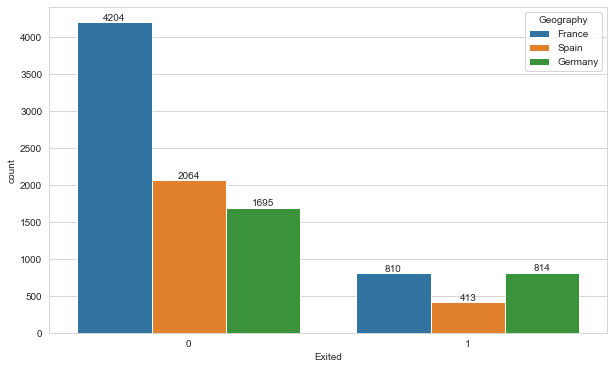

In [17]:
ax = sns.countplot(x='Exited',data=df, hue='Geography')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2]);

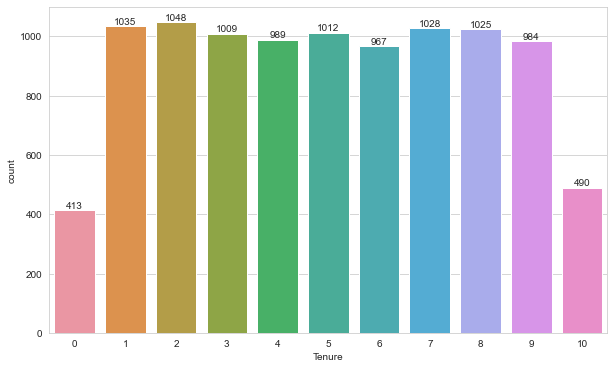

In [18]:
ax = sns.countplot(df["Tenure"]);
ax.bar_label(ax.containers[0]);

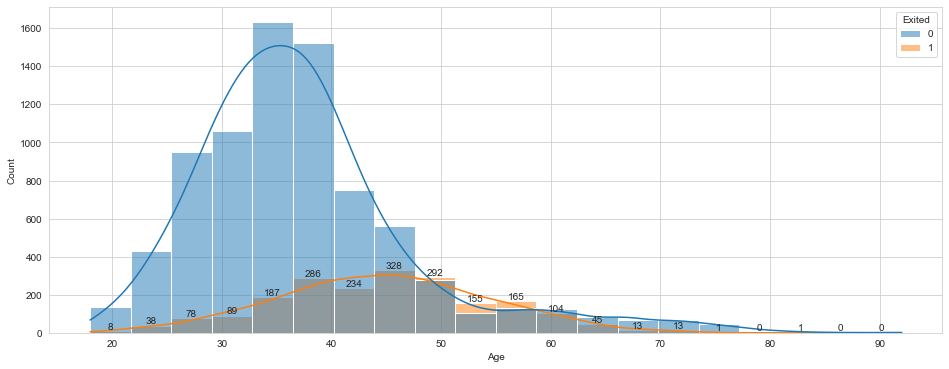

In [19]:
plt.figure(figsize=(16,6))
ax = sns.histplot(data=df, x="Age",bins=20, hue="Exited", kde=True);
ax.bar_label(ax.containers[0]);

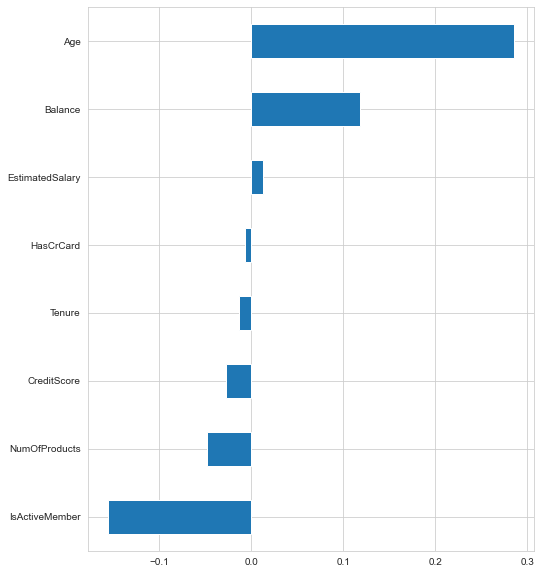

In [20]:
plt.figure(figsize = (8,10))
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh")
ax.bar_label(ax.containers[0]);

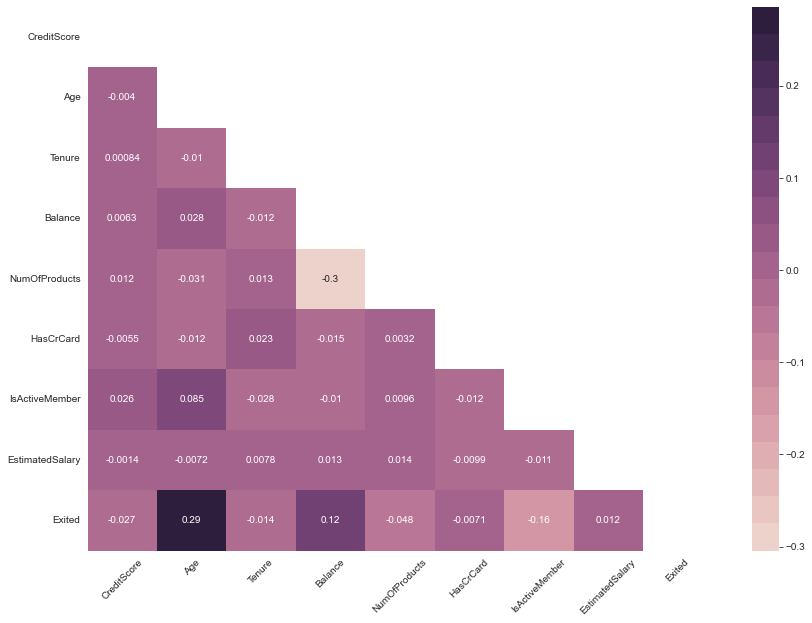

In [21]:
plt.figure(figsize=(14, 10))

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(df.corr())

# using the upper triangle matrix as mask 
sns.heatmap(df.corr(), annot=True, cmap = sns.cubehelix_palette(20), mask=matrix)

plt.xticks(rotation=45);

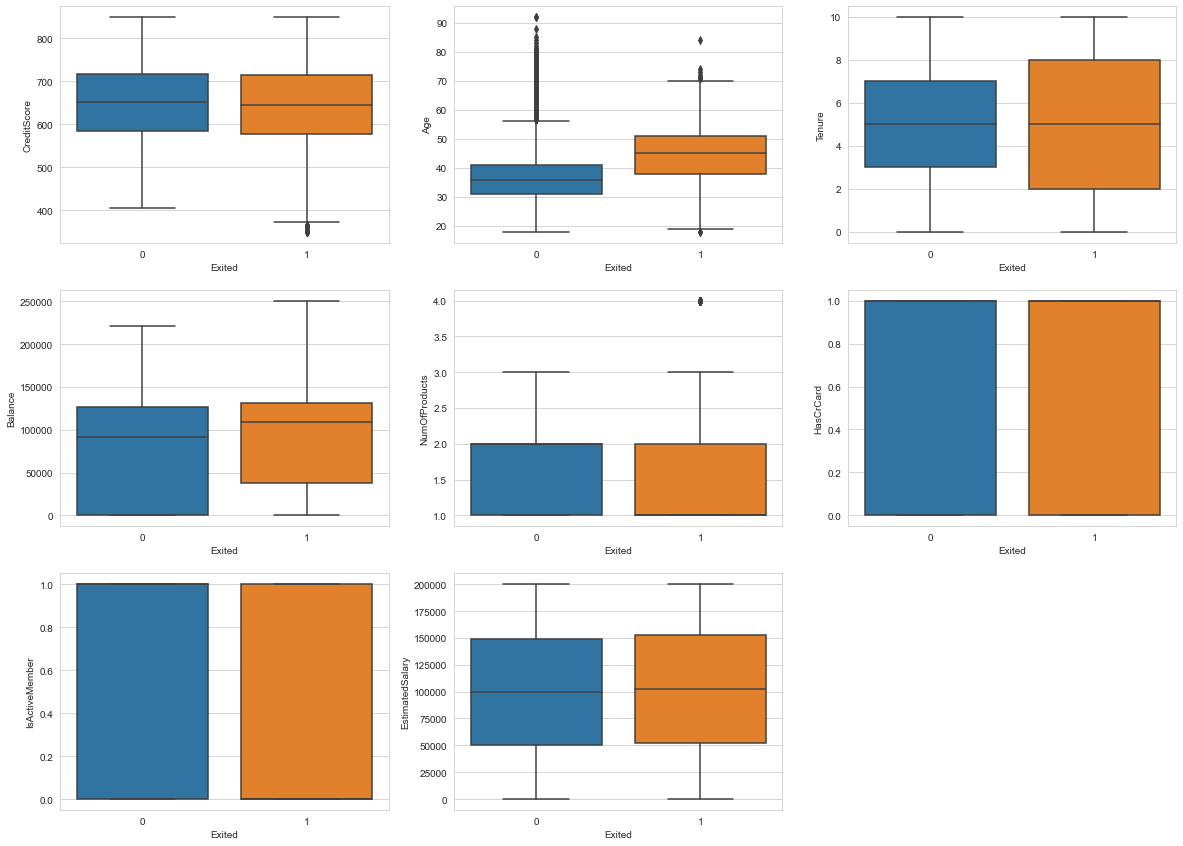

In [22]:
index = 0
plt.figure(figsize=(20,20))
for feature in num:
    if feature != "Exited":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='Exited', y=feature, data=df)

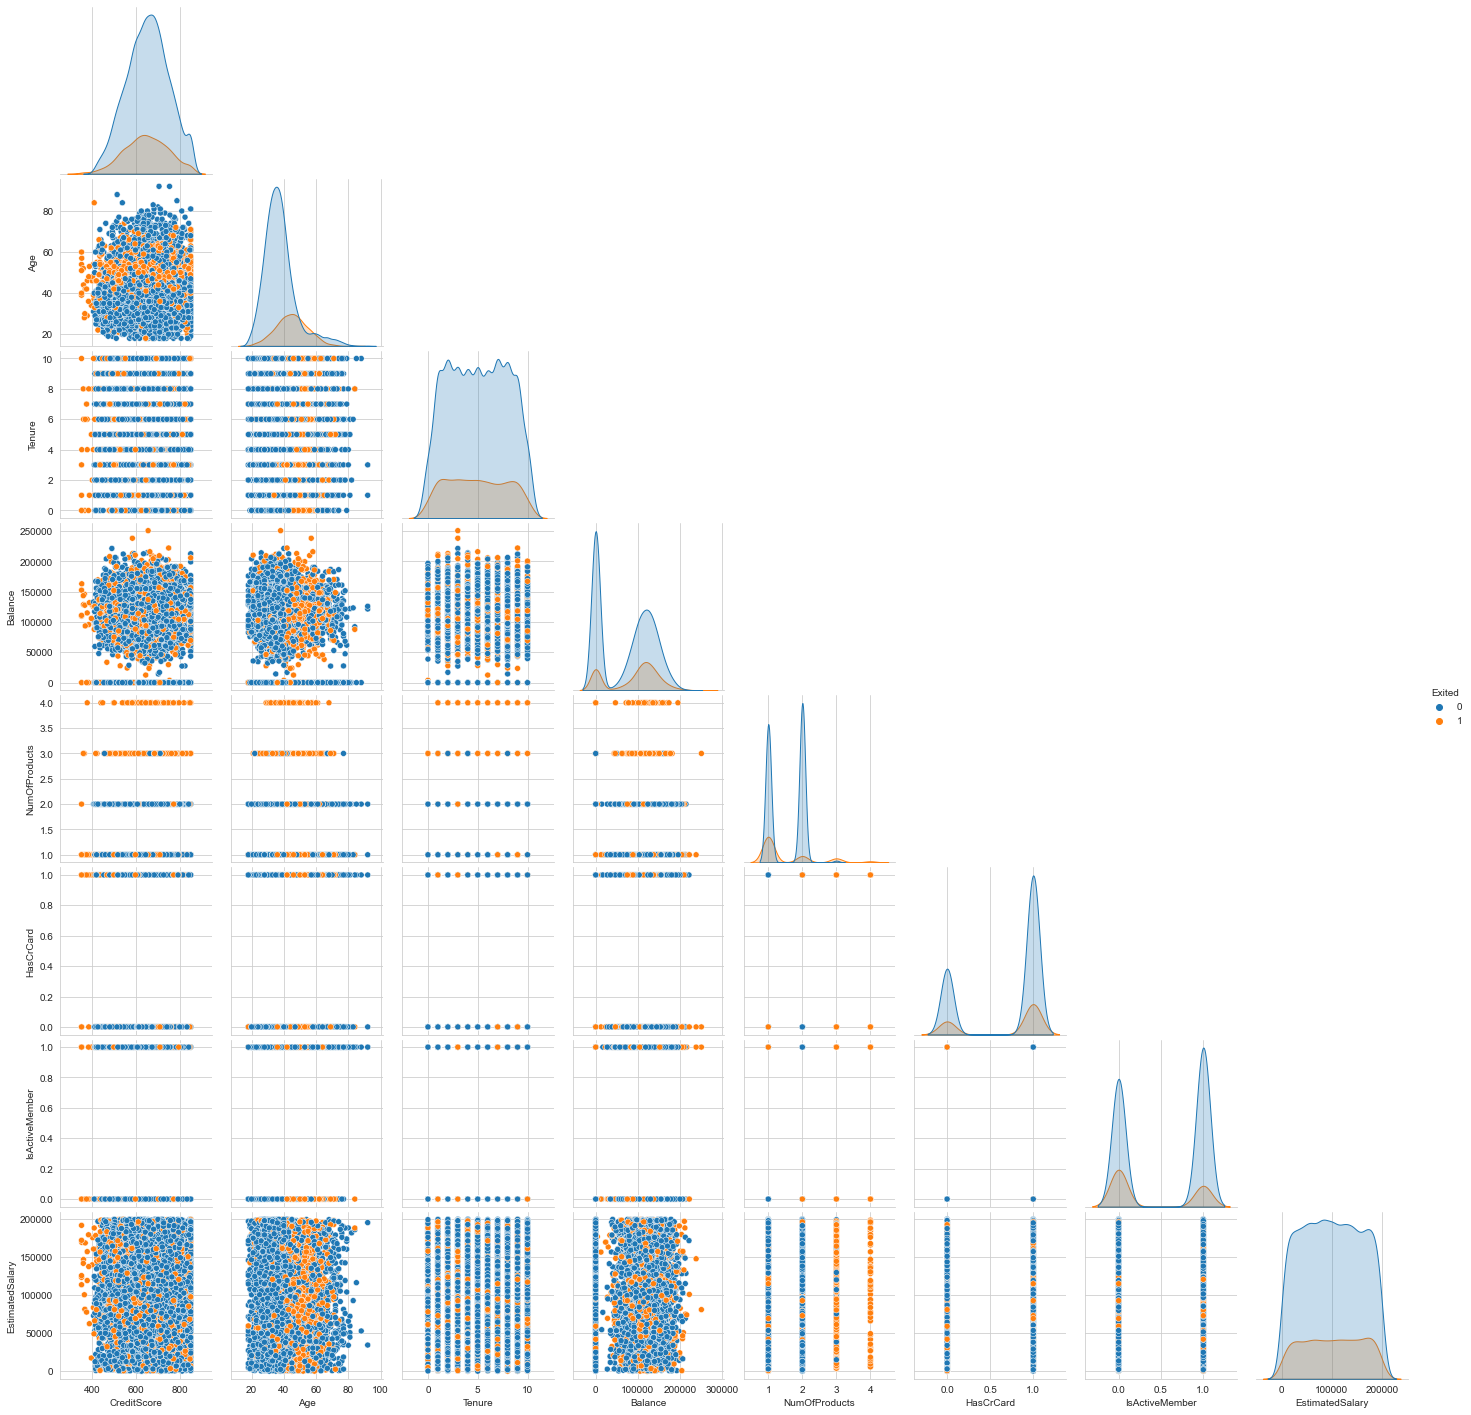

In [23]:
sns.pairplot(df, hue="Exited", corner=True);

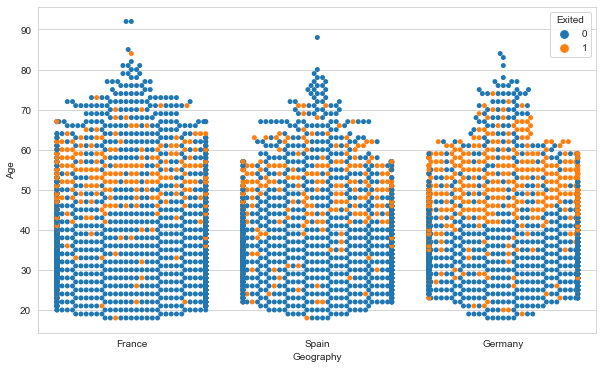

In [24]:
sns.swarmplot(y="Age", x="Geography", hue="Exited", data=df);

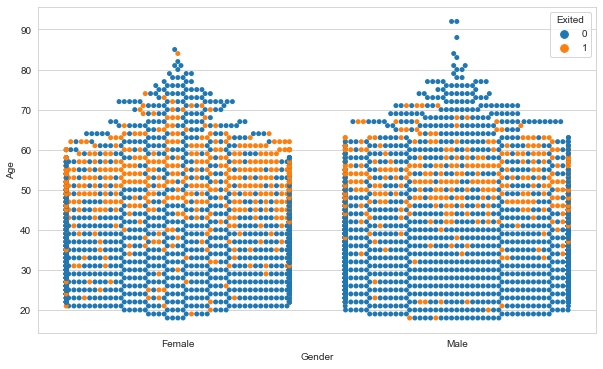

In [25]:
sns.swarmplot(y="Age", x="Gender", hue="Exited", data=df);

In [26]:
df.insert(11, 'churn', df['Exited'])

In [27]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,churn
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,0


In [28]:
df.drop('Exited', axis=1, inplace=True)

In [29]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [30]:
df = pd.get_dummies(df, drop_first =True)

In [31]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,0,0,0
1,608,41,1,83807.860,1,0,1,112542.580,0,0,1,0
2,502,42,8,159660.800,3,1,0,113931.570,1,0,0,0
3,699,39,1,0.000,2,0,0,93826.630,0,0,0,0
4,850,43,2,125510.820,1,1,1,79084.100,0,0,1,0


# Preprocessing of Data
- Train | Test Split, Scalling

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X = df.drop('churn', axis = 1)
y = df['churn']

In [34]:
seed = 21

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size=0.2, random_state=seed)

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

In [38]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
print(X_train.shape)   
print(X_test.shape) 

(8000, 11)
(2000, 11)


In [40]:
print(y_train.shape)
print(y_test.shape)

(8000,)
(2000,)


# Modelling & Model Performance

## without class_weigth

### Create The Model

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [41]:
# define sequential model

model = Sequential()
model.add(Dense(15, activation='relu',input_dim = X_train.shape[1]))
model.add(Dense(10, activation='relu'))
model.add(Dense(5,  activation = 'relu'))
model.add(Dense(1, activation='sigmoid')) # we use sigmoid for binary output
model.summary()


# compile the model

model.compile(optimizer = 'adam',loss = 'binary_crossentropy', metrics = ['accuracy'])

# early stopping 
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

# now we fit our model to training data
model.fit(x = X_train, y = y_train, epochs=250, validation_split = 0.1, batch_size=32,verbose=1,callbacks = [early_stop])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                180       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
225/225 [==============================] - 1s 2ms/step - loss: 0.5316 - accuracy: 0.7876 - val_loss: 0.4801 - val_accuracy: 0.7975
Epoch 2/250
225/225 [==========================

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                180       
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
 dense_2 (Dense)             (None, 5)                 55        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [43]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.532,0.788,0.480,0.798
1,0.479,0.797,0.459,0.798
2,0.465,0.799,0.438,0.812
3,0.452,0.807,0.423,0.821
4,0.444,0.812,0.416,0.819


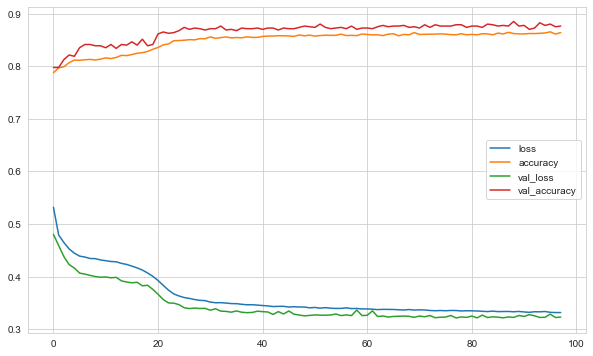

In [44]:
loss_df.plot();

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [45]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3252 - accuracy: 0.8670


[0.3251543939113617, 0.8669999837875366]

In [46]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3251543939113617
accuracy :  0.8669999837875366


In [47]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1523   70]
 [ 196  211]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1593
           1       0.75      0.52      0.61       407

    accuracy                           0.87      2000
   macro avg       0.82      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [48]:
from sklearn.utils import class_weight

In [49]:
class_weights = class_weight.compute_class_weight('balanced',
                                                 classes= np.unique(y_train),
                                                 y = y_train)

In [50]:
class_weights

array([0.62794349, 2.45398773])

In [51]:
# define sequential model

model_weighted  = Sequential()
model_weighted .add(Dense(15, activation='relu',input_dim = X_train.shape[1]))
model_weighted .add(Dense(10, activation='relu'))
model_weighted .add(Dense(5,  activation = 'relu'))
model_weighted .add(Dense(1, activation='sigmoid')) # we use sigmoid for binary output
model_weighted .summary()


# compile the model
opt = Adam(lr = 0.005)

model_weighted .compile(optimizer = opt, loss = 'binary_crossentropy',metrics = ['accuracy'])

# early stopping 
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

# now we fit our model to training data

class_weight = {0:0.62794349 , 1:2.45398773}

model_weighted .fit(x=X_train, y=y_train, epochs=250, batch_size=32, validation_split = 0.1, verbose=1, class_weight=class_weight,
          callbacks = [early_stop])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 15)                180       
                                                                 
 dense_5 (Dense)             (None, 10)                160       
                                                                 
 dense_6 (Dense)             (None, 5)                 55        
                                                                 
 dense_7 (Dense)             (None, 1)                 6         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
225/225 [==============================] - 1s 2ms/step - loss: 0.6362 - accuracy: 0.6574 - val_loss: 0.6592 - val_accuracy: 0.6037
Epoch 2/250
225/225 [========================

In [52]:
loss_df = pd.DataFrame(model_weighted .history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.636,0.657,0.659,0.604
1,0.573,0.702,0.527,0.744
2,0.524,0.747,0.487,0.769
3,0.510,0.759,0.457,0.769
4,0.501,0.757,0.481,0.749


### Add Dropout Layer

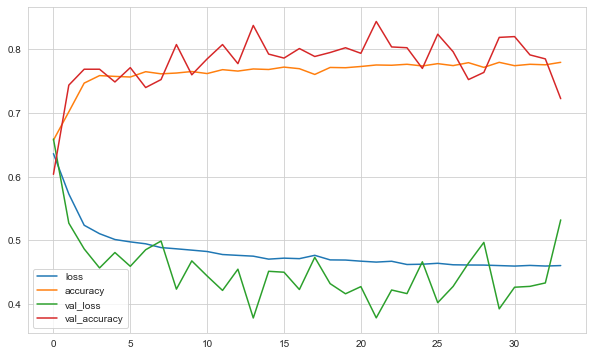

In [53]:
loss_df.plot();

### Add Early Stop

#### Monitor the "val_loss" as metric

In [54]:
model_weighted .evaluate(X_test, y_test, verbose=0)

[0.5489886403083801, 0.7225000262260437]

In [55]:
loss, accuracy = model_weighted.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5489886403083801
accuracy :  0.7225000262260437


#### Monitor the "val_recall" as metric

In [56]:
y_pred = (model_weighted.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 938us/step
[[1100  493]
 [  62  345]]
              precision    recall  f1-score   support

           0       0.95      0.69      0.80      1593
           1       0.41      0.85      0.55       407

    accuracy                           0.72      2000
   macro avg       0.68      0.77      0.68      2000
weighted avg       0.84      0.72      0.75      2000



## GridSearchCV

In [57]:
def build_classifier(optimizer, learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units = 15, activation = 'relu'))
    classifier.add(Dense(units = 10, activation = 'relu'))
    classifier.add(Dense(units = 5, activation = 'relu'))
    classifier.add(Dense(units = 1, activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer(learn_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

In [58]:
early_stop = EarlyStopping(monitor = "val_accuracy", mode = "auto", verbose = 1, patience = 15)

In [59]:
tf.random.set_seed(seed)

classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 200)

parameters = {'batch_size': [32, 64],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'accuracy',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)
grid_model.fit(X_train, y_train, callbacks = [early_stop])

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Epoch 1/200
113/113 [==============================] - 1s 3ms/step - loss: 0.5278 - accuracy: 0.7753 - val_loss: 0.4728 - val_accuracy: 0.7975
Epoch 2/200
113/113 [==============================] - 0s 2ms/step - loss: 0.4617 - accuracy: 0.7993 - val_loss: 0.4293 - val_accuracy: 0.8188
Epoch 3/200
113/113 [==============================] - 0s 2ms/step - loss: 0.4182 - accuracy: 0.8167 - val_loss: 0.3791 - val_accuracy: 0.8400
Epoch 4/200
113/113 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.8290 - val_loss: 0.3673 - val_accuracy: 0.8575
Epoch 5/200
113/113 [==============================] - 0s 2ms/step - loss: 0.3837 - accuracy: 0.8369 - val_loss: 0.3620 - val_accuracy: 0.8525
Epoch 6/200
113/113 [==============================] - 0s 2ms/step - loss: 0.3733 - accuracy: 0.8428 - val_loss: 0.3564 - val_accuracy: 0.8575
Epoch 7/200
113/113 [==============================] - 0s 2ms/step - loss: 0.36

GridSearchCV(cv=10,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x00000242A6844B50>,
             n_jobs=-1,
             param_grid={'batch_size': [32, 64],
                         'learn_rate': [0.001, 0.003, 0.005],
                         'optimizer': [<class 'keras.optimizers.optimizer_v2.adam.Adam'>,
                                       <class 'keras.optimizers.optimizer_v2.rmsprop.RMSprop'>,
                                       <class 'keras.optimizers.optimizer_v2.adadelta.Adadelta'>,
                                       <class 'keras.optimizers.optimizer_v2.nadam.Nadam'>]},
             scoring='accuracy', verbose=1)

In [76]:
grid_model.best_score_

0.8571250000000001

In [77]:
grid_model.best_params_

{'batch_size': 64,
 'learn_rate': 0.003,
 'optimizer': keras.optimizers.optimizer_v2.adam.Adam}

In [78]:
grid_result = pd.DataFrame(grid_model.cv_results_)[["mean_test_score", "std_test_score", "rank_test_score", "params"]].sort_values(by='rank_test_score')
grid_result

,mean_test_score,std_test_score,rank_test_score,params
16,0.857,0.014,1,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
20,0.857,0.013,2,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
8,0.856,0.012,3,"{'batch_size': 32, 'learn_rate': 0.005, 'optim..."
0,0.856,0.013,4,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
4,0.855,0.018,5,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."
19,0.855,0.010,6,"{'batch_size': 64, 'learn_rate': 0.003, 'optim..."
23,0.855,0.016,6,"{'batch_size': 64, 'learn_rate': 0.005, 'optim..."
15,0.854,0.012,8,"{'batch_size': 64, 'learn_rate': 0.001, 'optim..."
3,0.854,0.012,9,"{'batch_size': 32, 'learn_rate': 0.001, 'optim..."
7,0.853,0.014,10,"{'batch_size': 32, 'learn_rate': 0.003, 'optim..."


In [79]:
y_pred = (grid_model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1530   63]
 [ 194  213]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1593
           1       0.77      0.52      0.62       407

    accuracy                           0.87      2000
   macro avg       0.83      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000



### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

#### The Evaluation of ROC and AUC for Model without "class_weigth"

63/63 [==============================] - 0s 1ms/step


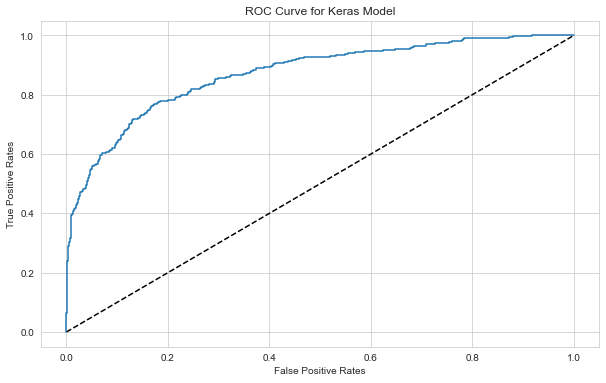

In [64]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rates')
plt.ylabel('True Positive Rates')
plt.title('ROC Curve for Keras Model')
plt.show()

In [65]:
roc_auc_score(y_test, y_pred_proba)

0.8707598199123623

#### The Evaluation of ROC and AUC for Model with "class_weigth"

63/63 [==============================] - 0s 952us/step


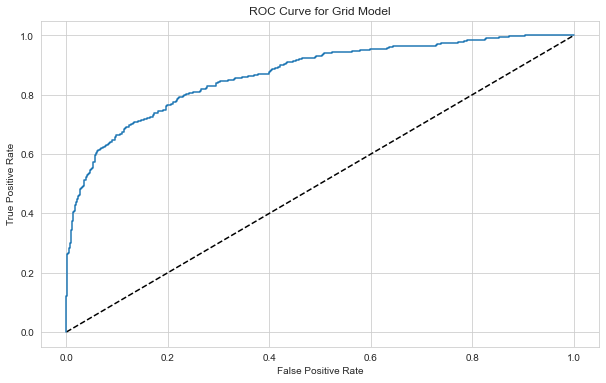

In [66]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Grid Model')
plt.show()

In [67]:
roc_auc_score(y_test, y_pred_proba)

0.8688719536177164

#### The Evaluation of ROC and AUC for GridsearchCV Model"

63/63 [==============================] - 0s 1ms/step


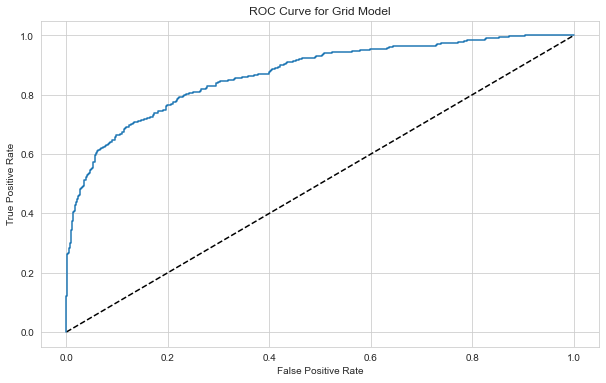

In [68]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Grid Model')
plt.show()

In [69]:
roc_auc_score(y_test, y_pred_proba)

0.8688719536177164

# Final Model and Model Deployment

In [70]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [71]:
final_model  = Sequential()
final_model.add(Dense(15, activation='relu',input_dim = X_train.shape[1]))
final_model.add(Dense(10, activation='relu'))
final_model.add(Dense(5,  activation = 'relu'))
final_model.add(Dense(1, activation='sigmoid'))
final_model.summary()


# compile the model
opt = Adam(lr = 0.005)

final_model.compile(optimizer = opt, loss = 'binary_crossentropy',metrics = ['accuracy'])

# early stopping 
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20)

# now we fit our model to training data

class_weight = {0:0.62794349 , 1:2.45398773}

final_model.fit(x=X_train, y=y_train, epochs=250, batch_size=32, validation_data = (X_test, y_test), verbose=1,
                    class_weight=class_weight,
                    callbacks = [early_stop])

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 15)                180       
                                                                 
 dense_13 (Dense)            (None, 10)                160       
                                                                 
 dense_14 (Dense)            (None, 5)                 55        
                                                                 
 dense_15 (Dense)            (None, 1)                 6         
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/250
250/250 [==============================] - 1s 2ms/step - loss: 0.6417 - accuracy: 0.6641 - val_loss: 0.5637 - val_accuracy: 0.7300
Epoch 2/250
250/250 [========================

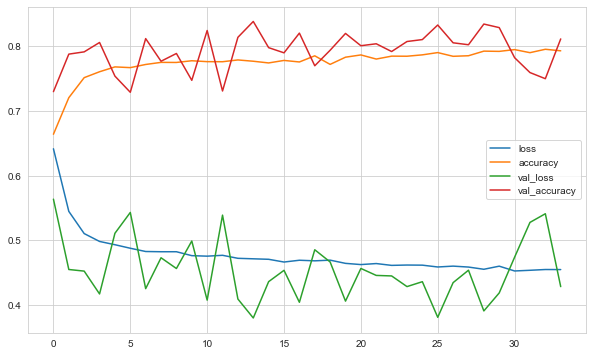

In [72]:
loss_df = pd.DataFrame(final_model.history.history)

loss_df.plot();

In [73]:
y_pred = (final_model.predict(X_test) > 0.5).astype("int32")
#y_pred = model.predict_classes(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1327  266]
 [ 111  296]]
              precision    recall  f1-score   support

           0       0.92      0.83      0.88      1593
           1       0.53      0.73      0.61       407

    accuracy                           0.81      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.81      0.82      2000



In [80]:
model.save('model_churn.h5')

### Loading Model and Scaler

In [81]:
from tensorflow.keras.models import load_model

In [82]:
model_churn = load_model('model_churn.h5')

scaler_churn = pickle.load(open("scaler_churn", "rb"))

## Prediction

In [83]:
random_ten_customer = df.drop('churn', axis = 1).sample(n=10, random_state=101).iloc[0:10, :]

random_ten_customer

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6676,619,52,8,0.000,2,1,1,123242.110,0,1,1
6421,616,23,8,73112.950,1,1,1,62733.050,0,0,1
9834,516,46,6,62212.290,1,0,1,171681.860,0,0,0
8492,494,28,9,114731.760,2,0,1,79479.740,0,0,1
9982,655,46,7,137145.120,1,1,0,115146.400,1,0,0
8844,695,35,7,0.000,2,1,0,160387.980,0,1,1
7247,582,40,3,110150.430,1,1,1,191757.650,1,0,0
5862,682,40,4,0.000,2,1,1,140745.910,0,0,1
3662,632,28,5,118890.810,1,0,1,145157.970,0,0,0
3457,657,36,8,188241.050,2,0,0,183058.510,0,1,1


In [84]:
random_ten_customer = scaler_churn.transform(random_ten_customer)

random_ten_customer

array([[0.538     , 0.45945946, 0.8       , 0.        , 0.33333333,
        1.        , 1.        , 0.6162115 , 0.        , 1.        ,
        1.        ],
       [0.532     , 0.06756757, 0.8       , 0.29140497, 0.        ,
        1.        , 1.        , 0.3136373 , 0.        , 0.        ,
        1.        ],
       [0.332     , 0.37837838, 0.6       , 0.2479584 , 0.        ,
        0.        , 1.        , 0.85843338, 0.        , 0.        ,
        0.        ],
       [0.288     , 0.13513514, 0.9       , 0.45728431, 0.33333333,
        0.        , 1.        , 0.39737875, 0.        , 0.        ,
        1.        ],
       [0.61      , 0.37837838, 0.7       , 0.54661684, 0.        ,
        1.        , 0.        , 0.57572908, 1.        , 0.        ,
        0.        ],
       [0.69      , 0.22972973, 0.7       , 0.        , 0.33333333,
        1.        , 0.        , 0.80195859, 0.        , 1.        ,
        1.        ],
       [0.464     , 0.2972973 , 0.3       , 0.43902459, 0.

In [85]:
prediction = pd.DataFrame(model_churn.predict(random_ten_customer) > 0.5, columns=['prediction']).astype("int32")
prediction

1/1 [==============================] - 0s 54ms/step


,prediction
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,0
8,0
9,0


In [86]:
actual = pd.DataFrame(df.sample(n=10, random_state=101)["churn"]).rename({'churn': 'actual'}, axis=1).astype("int32")
actual

,actual
6676,0
6421,0
9834,1
8492,0
9982,1
8844,0
7247,1
5862,0
3662,0
3457,1


In [87]:
pred_df = actual.join(prediction.set_index(actual.index))

pred_df

,actual,prediction
6676,0,0
6421,0,0
9834,1,0
8492,0,0
9982,1,1
8844,0,0
7247,1,0
5862,0,0
3662,0,0
3457,1,0


In [88]:
pred_df['prediction_accuracy'] = pred_df.apply(lambda x: "Correct Pred" if int(x['actual'] == x['prediction']) else "Wrong Pred", axis=1)

pred_df

,actual,prediction,prediction_accuracy
6676,0,0,Correct Pred
6421,0,0,Correct Pred
9834,1,0,Wrong Pred
8492,0,0,Correct Pred
9982,1,1,Correct Pred
8844,0,0,Correct Pred
7247,1,0,Wrong Pred
5862,0,0,Correct Pred
3662,0,0,Correct Pred
3457,1,0,Wrong Pred


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___